# Assignment 3


### Relativity visualization and radiation

On this homework assignment, you will be responsible for importing all of the python packages you need for your calculations. You will also be responsible for making your plot axis labels large enough for me to read them easily. Please make sure to put units on your axes where appropriate.

Instead of defining your own constants, use the pre-programmed values from <tt>scipy.constants</tt>.

In [90]:
# Import your packages here
import scipy.constants
pi = scipy.constants.pi
c = scipy.constants.c
wien = scipy.constants.Wien
h = scipy.constants.h
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "DejaVu Sans"

<ol>
    <li>Recall the velocity addition example from class: Frank is on a space station, Mary is in a spacecraft moving away from the space station in the +x direction, and she is firing a proton gun at asteroids that are in the spacecraft's path.
        <ol>
            <li>Assume the protons leave the proton gun with speed 0.99c in the +x direction. Plot the proton speed measured by <em>Frank</em> as a function of spacecraft speed relative to the space station.</li>
            <li>Now suppose the protons leave the gun in a "cone" shape rather than straight along the +x axis, so that their velocity vectors have y and z components. The angle of the proton code is 15°, and their launch speed is still 0.99c. Plot Frank's measurement of the y-component of the proton velocity at the edge of the cone, as a function of spacecraft speed.</li>
        </ol>
    </li>
</ol>

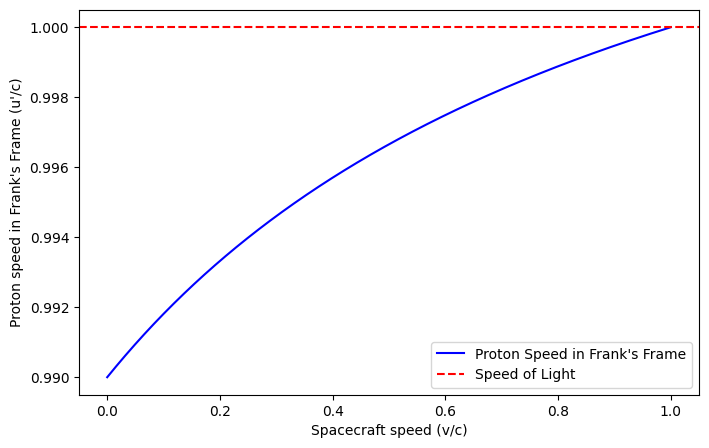

<ipython-input-8-98a177cda8a4>:22: RuntimeWarning: divide by zero encountered in divide
  gamma = 1/np.sqrt(1-(v**2/c**2))


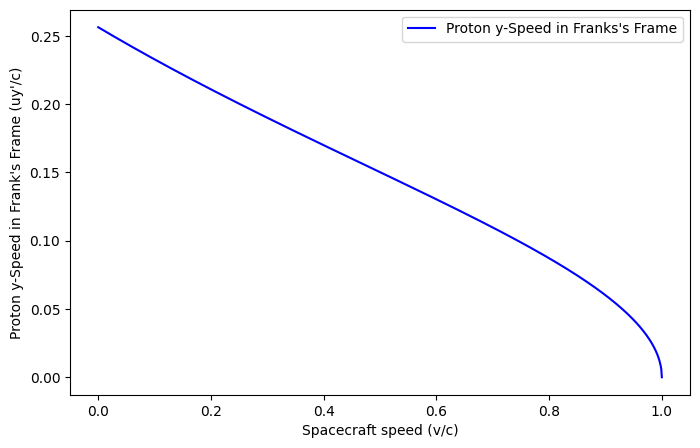

In [8]:
#1
def velocity_addition(u, v, c):
  return (u + v) / (1 +((u*v)/c**2))

u = 0.99 * c
v_vals = np.linspace(0, c, 1000)
uprime_vals = velocity_addition(u, v_vals, c)

plt.figure(figsize=(8, 5))
plt.plot(v_vals/c, uprime_vals/c, label="Proton Speed in Frank's Frame", color="b")
plt.axhline(y=1, color='r', linestyle='--', label="Speed of Light")
plt.xlabel("Spacecraft speed (v/c)")
plt.ylabel("Proton speed in Frank's Frame (u'/c)")
plt.legend()
plt.show()

#2
def velocity_x(ux, v, c):
  return (ux +v) / (1+((ux*v)/c**2))

def velocity_y(uy, ux, v, c):
  gamma = 1/np.sqrt(1-(v**2/c**2))
  return uy / (gamma * (1 + (ux*v)/c**2))

angle = np.radians(15)
u = 0.99*c
ux = u * np.cos(angle)
uy = u * np.sin(angle)
uyprime_vals = velocity_y(uy, ux, v_vals, c)

plt.figure(figsize=(8, 5))
plt.plot(v_vals/c, uyprime_vals/c, label="Proton y-Speed in Franks's Frame", color='b')
plt.xlabel("Spacecraft speed (v/c)")
plt.ylabel("Proton y-Speed in Frank's Frame (uy'/c)")
plt.legend()
plt.show()

<ol start=2>
    <li>Make a 2-d plot of spacetime with x on the horizontal axis and ct on the vertical axis.
    <ol>
        <li>Imagine two flashbulbs positioned in the Earth's approximate rest frame with locations x = 0 km and x = 300,000 km (slightly less than the moon's distance from Earth). Both bulbs flash at t = 0. Represent the flashes with points on your spacetime plot. Put in world lines representing travel of the light from each flash.</li>
        <li>Suppose the James Webb Space Telescope is at rest at x = 150,000 km. Mark it on the plot with the symbol of your choice, then plot its world line.</li>
        <li>Aliens are sending a reconnaissance microprobe through the solar system at high speed. At t = 0, the probe is lurking at x = 500,000 km. In the (approximate) rest frame of observers on Earth, the microprobe moves at speed 0.1c in the -x direction. Mark the probe's position at t = 0 and plot its world line.</li>
        </ol></li>
</ol>

Based only on your plot, would you say the flashes were simultaneous the point of view of the James Webb Space Telescope? What about from the point of view of the microprobe?

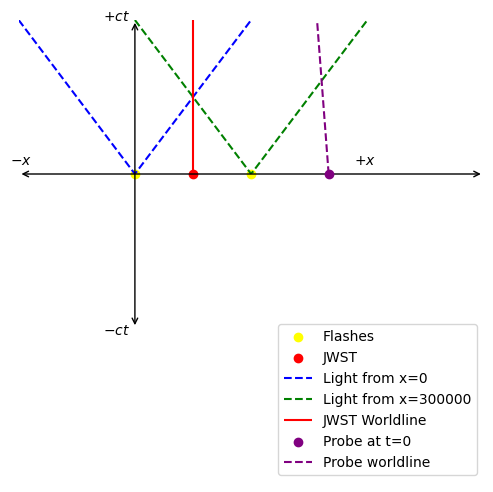

In [84]:
plt.figure(figsize=(6,6))
plt.xlim([-1,3])
plt.ylim([-2,1])
plt.annotate(text='', xy=(-1,0), xytext=(3,0), arrowprops=dict(arrowstyle='<->'))
plt.annotate(text='', xy=(0,-1), xytext=(0,1), arrowprops=dict(arrowstyle='<->'))
plt.text(1.98, 0.04, r"$+x$", horizontalalignment='center', verticalalignment='bottom')
plt.text(-0.98, 0.04, r"$-x$", horizontalalignment='center', verticalalignment='bottom')
plt.text(-0.04, 1.02, r"$+ct$", horizontalalignment='right', verticalalignment='center')
plt.text(-0.04, -1.02, r"$-ct$", horizontalalignment='right', verticalalignment='center')
plt.axis('off')

#Points are normalized with x/300000 and ct/300000, so x = 300000 km is x = 1 on the plot
flash_x = np.array([0, 1])
flash_ct = np.array([0, 0])
flash_jwstx = np.array([0.5])
flash_jwstct = np.array([0])
plt.scatter(flash_x, flash_ct, color='yellow', label='Flashes')
plt.scatter(flash_jwstx, flash_jwstct, color='red', label='JWST')

x_values = np.linspace(-1, 2, 200)
ct_values = np.abs(x_values)

plt.plot(x_values, ct_values, 'b--', label='Light from x=0')
plt.plot(x_values + 1, ct_values, 'g--', label='Light from x=300000')
plt.vlines(x = 0.5, ymin=0, ymax=1, color = 'red', label = 'JWST Worldline')

probe_x0 = 500000 / 300000
probe_ct_values = np.linspace(0, 1, 200)
probe_x_values = probe_x0 - 0.1 * probe_ct_values
plt.scatter([probe_x0], [0], color='purple', label='Probe at t=0', zorder=3)
plt.plot(probe_x_values, probe_ct_values, 'purple', linestyle='--', label='Probe worldline')

plt.legend()
plt.show()

<ol start=3>
    <li>Use Wien's displacement law, λmax = (2.898x10^-3 m*K)/T, to find and plot the wavelength of maximum intensity for seven different types of stars: O5, B5, A5, F5, G5, K5, M5. Label both axes and each data point on your plot. You may find <a href="https://sites.uni.edu/morgans/astro/course/Notes/section2/spectraltemps.html">this table</a> of star types and temperatures helpful. Warning: <em>watch your units</em>.</li>
</ol>

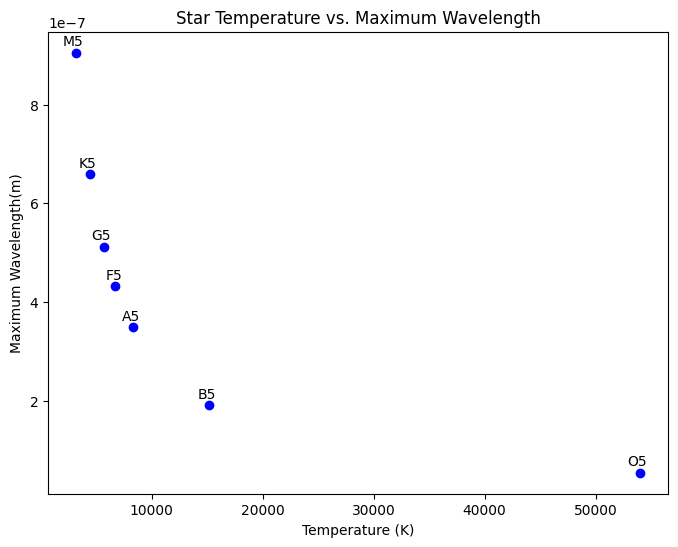

In [89]:
def lambda_max(T):
  return wien / T

star_types = np.array(["O5", "B5", "A5", "F5", "G5", "K5", "M5"])
star_temps = np.array([54000, 15200, 8310, 6700, 5660, 4400, 3200])
lambdas = np.array([lambda_max(T) for T in star_temps])

plt.figure(figsize=(8, 6))
plt.scatter(star_temps, lambdas, color='b', marker='o', label="Stars")

for i, star in enumerate(star_types):
  plt.annotate(star, (star_temps[i], lambdas[i]), textcoords='offset points', xytext=(5, 5), ha='right')

plt.xlabel("Temperature (K)")
plt.ylabel("Maximum Wavelength(m)")
plt.title("Star Temperature vs. Maximum Wavelength")

plt.show()

In class we will describe the photoelectric effect qualitatively in terms of photons knocking electrons loose from their atoms. Here we will delve into the photoelectric effect quantitatively. Read about the photoelectric effect in your textbook, then read <em>Photoelectric effect step by step</em> in the Quantization module of Canvas. (Note: <em>Photoelectric effect step by step</em> is designed to go along with a lab, which we don't have.)

A note about units: recall from PHYS 208/245 that 1 Volt = 1 Joule/Coulomb. Electrons and protons give us a fundamental unit of electric charge, or elementary charge, $|q| = e = 1.602 \times 10^{−19}$ C. We can also calculate a fundamental unit of energy by calculating the change in kinetic energy of the elementary charge $e$ accelerated through an electric potential of 1 Volt. This new unit of energy is called the electron-Volt or eV. 1 eV = $1.602 \times 10^{−19}$ J.

<ol start=4>
    <li>Assume you are trying to verify the experimental results that led to Einstein's successful explanation of the photoelectric effect. You have two emitters or "photocathodes"; one is made of aluminum and the other is made of gold. On <strong>one set of axes</strong>, plot the <em>maximum</em> photoelectron kinetic energy in eV that you could measure as a function of frequency $\nu$ from <strong>both photocathodes</strong>. Make sure your plot shows the frequency cutoffs below which <em>no</em> photoelectrons will be generated. Label both axes and put a legend on your plot so a reader with no physics experience will know which curve belongs to which metal. You may find this <a href="http://hyperphysics.phy-astr.gsu.edu/hbase/Tables/photoelec.html">table of work functions</a> helpful.</li>
</ol>

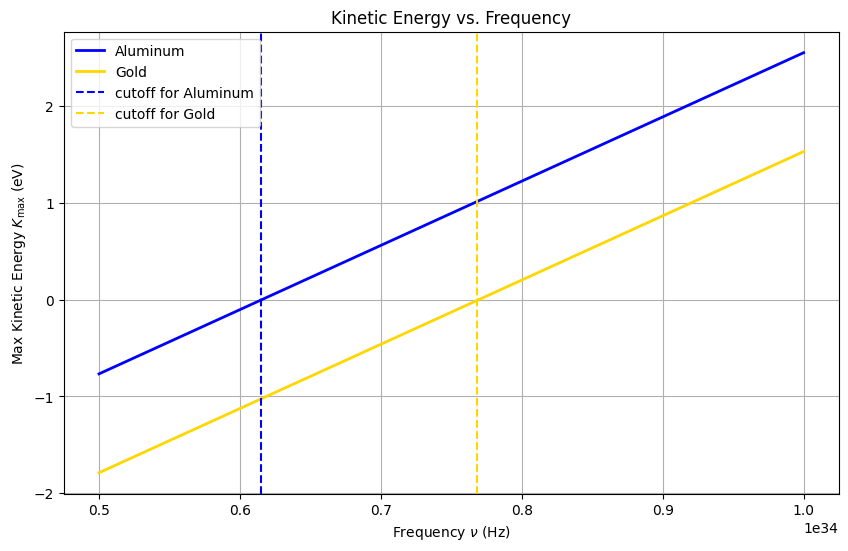

In [174]:
phi_al = 4.08
phi_au = 5.1

nu = np.linspace(5e33, 10e33, 100)

Kmax_al = h * nu - phi_al
Kmax_au = h * nu - phi_au

plt.figure(figsize=(10, 6))

plt.plot(nu, Kmax_al, label='Aluminum', color='blue', linewidth=2)
plt.plot(nu, Kmax_au, label='Gold', color='gold', linewidth=2)
plt.axvline(x=6.15e33, color='blue', linestyle='--', label='cutoff for Aluminum')
plt.axvline(x=7.68e33, color='gold', linestyle='--', label='cutoff for Gold')
plt.xlabel(r"Frequency $\nu$ (Hz)")
plt.ylabel(r"Max Kinetic Energy $K_{\max}$ (eV)")
plt.title("Kinetic Energy vs. Frequency")
plt.legend()
plt.grid(True)

plt.show()